In [15]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

import pandas as pd

In [17]:
f = open("C:\\Users\\lee\\Desktop\\02.[텍스트데이터] naver-news\\KB국민은행_20190101_20190331.txt", 'rt',encoding='utf-8')
s = f.read()
#print(s)


In [30]:
df =pd.read_csv('C:\\Users\\lee\\Desktop\\02.[텍스트데이터] naver-news\\KB국민은행_20190101_20190331.txt', sep='\t', names=['Date','Company','Title','Content'])
df

,Date,Company,Title,Content
0,2019.03.31.,매경닷컴,"제5회 퇴직연금 대상, KB국민은행·한수원",KB국민은행과 한국수력원자력이 '제5회 대한민국 퇴직연금대상'에서 사업자 부문 대상...
1,2019.03.30.,financial news,"KB국민은행, 미세먼지 저감을 위한 에코트리 캠페인 진행",KB국민은행은 지난 26일 강원도 양구군2사단 노도 과학화 전투 훈련장에서 미세먼지...
2,2019.03.29.,뉴스1,인사말 하는 허인 KB국민은행장,(서울=뉴스1) 박정호 기자 = 허인 KB국민은행장이 29일 오전 서울 여의도 금융...
3,2019.03.29.,노컷뉴스,"KB국민은행, 동의대에 대학발전기금 4억5천만원 전달","[부산CBS 이강현 기자]KB국민은행이 지난 28일, 동의대학교 총장실에서 대학발전..."
4,2019.03.29.,머니S,"원더쇼핑, KB국민은행 뱅킹앱 '리브똑똑'과 투썸아메리카노 '0원' 이벤트",원더쇼핑이 KB국민은행 뱅킹앱 ‘리브똑똑’과 함께 투썸플레이스 아메리카노 0원 이벤...
5,2019.03.30.,머니S,"[2019 대한민국 파워기업 50] KB국민은행, 해외영토 확장 가속 페달",허인 KB국민은행장/사진=임한별 기자허인 KB국민은행장이 올해 동남아시아 등 신남방...
6,2019.03.28.,스포츠동아,"KB국민은행, 고객패널 ‘제6기 KB호민관’ 모집",KB국민은행이 4월3일까지 ‘제6기 KB호민관(고객패널)’을 모집(사진)한다. 고객...
7,2019.03.27.,서울경제,"KB국민은행, 미세먼지 저감 위한 ‘에코트리 캠페인’ 진행",KB국민은행은 지난 26일 강원도 양구군 2사단 노도 과학화 전투 훈련장에서 미세먼...
8,2019.03.25.,MBN,"KB국민은행, TDF 연금 가입고객 이벤트",KB국민은행은 연금 대표상품인 TDF 가입고객을 대상으로 모바일 상품권을 제공하는 ...
9,2019.03.26.,세계닷컴,"KB국민은행,『연금의 봄! TDF 해봄!』고객 이벤트 실시",KB국민은행은 연금 대표상품인 TDF 가입고객을 대상으로 오는 5월 말까지『연금의 ...


In [29]:
with sqlite3.connect('kb1.db') as conn:
    cur=conn.cursor() #커서는 하나씩 일을해나가는것
    sql= 'create table kb1(Date integer primary key,Company varchar(100), Title varchar(200),Content varchar(10000))'
    cur.execute(sql)
    conn.commit() #커밋
    cur.close()#ex)신한은행 홈페이지에서 나오는 클라이언트들의 반응을 뽑아서 분석하고 정제하여 앞으로 나아가야할 인사이트를 알아내겠다.

In [31]:
dbname="bank.db"

In [32]:
def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT
        from kb
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [33]:
hannanum = Hannanum()
kkma = Kkma()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [35]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
#print(df['Content'])
a=df['Content']


In [53]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 1000,
    height = 1000
)
w=w.generate(s)

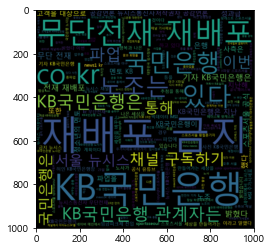

In [54]:
plt.imshow(w,interpolation='bilinear')